In [1]:
import RoCell

/root/miniconda3/envs/autocell/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data and QC

`file_name` is the path to the `h5ad` file (must ends with 'h5ad')

`gene_id_col_label` is the name of column containing gene id information in the h5ad file

In [4]:
workflow = RoCell.Workflow(file_name = '/data/autocell/mix_raw_fullinfo.h5ad')
workflow.preprocessing(gene_id_col_label = 'gene_ids')

started with  3388  total cells and  32738  total genes
finished with 3388  total cells and 32738 total genes


### Compute the Pearson residual

`min_var_pr` is the minimum variance of Pearson residual, a recommended value is 1.3.

`min_mean_exp` is the minimum value of mean expression (count).

In [5]:
workflow.compute_Pearson_residual(min_var_pr = 1.3, min_mean_exp = 0.1)

### Compute the biological heterogeneity

`batch_label` is the column name for batches, this is dataset-specific.

In [6]:
workflow.compute_biological_heterogeneity(batch_label = 'Species Call by SNV')

compute batch-specific feature vector


100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.38s/it]

compute cosine similarity



100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.55s/it]


### Select the highly variable gene (HVG)

`hvg_min` is the minimum value for selecting highly-variable genes.

In [8]:
adata_hvg = workflow.select_hvg(hvg_min = 1.0)

### Autoencoder-augmented dimension reduction

3 0.295561752298422
6 0.2928627271737371
9 0.28836576800261227
12 0.28644366056791376
15 0.2830533574202231
18 0.28292297218975265
21 0.27990661535346717
24 0.2804543326298396
27 0.27798003596918924
------------------------------training is done!----------------------------


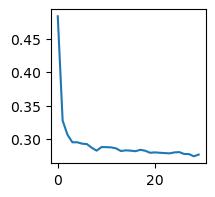

In [9]:
adata_latent = workflow.dimension_reduction(adata_hvg, device='cpu')